In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D,Dense,Flatten
from tensorflow.python.keras.utils import np_utils


In [2]:
Model = Sequential()
Model.add(Conv2D(128,3,3,input_shape=(200,200,3),activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1))
Model.add(Conv2D(64,3,3,activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1))
Model.add(Conv2D(64,3,3,activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1))


Instructions for updating:
Colocations handled automatically by placer.


In [3]:



Model.add(Flatten())

Model.add(Dense(units= 120,activation='relu'))
Model.add(Dense(units= 80,activation='relu'))
Model.add(Dense(units= 40,activation='relu'))
Model.add(Dense(units= 20,activation='relu'))
Model.add(Dense(1,activation='softmax'))

Model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


In [4]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('C:\\Users\\134033\\Downloads\\With Helmet',target_size = (200,200),
                                                 batch_size = 34,class_mode='binary')
test_set = train_datagen.flow_from_directory('C:\\Users\\134033\\Downloads\\Test_set',target_size=(200,200),
                                                batch_size=34,class_mode='binary')
type(training_set)

Found 19 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


keras_preprocessing.image.directory_iterator.DirectoryIterator

In [8]:
Model.fit_generator(training_set,steps_per_epoch=20000,validation_data=test_set,validation_steps=2000)


1/1 [==============================] - 2s 2s/step - loss: 8.3907 - acc: 0.4737 - val_loss: 6.3770 - val_acc: 0.6000


In [35]:
from sklearn.externals.joblib import dump,load

joblib.dump(Model, 'Img_mode')

NameError: name 'joblib' is not defined

In [9]:
import numpy as np
from tensorflow.python.keras.preprocessing  import image
from IPython.display import display


In [10]:
test_image = image.load_img('C:\\Users\\134033\\Downloads\\Without Images\\download.jpeg',target_size= (200,200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
print(test_image)

[[[[115. 234. 242.]
   [208. 255. 255.]
   [233. 245. 255.]
   ...
   [ 54.  78.  62.]
   [ 45.  70.  49.]
   [ 71.  97.  72.]]

  [[110. 227. 237.]
   [220. 255. 255.]
   [240. 253. 255.]
   ...
   [ 61.  88.  71.]
   [ 68.  95.  76.]
   [ 60.  88.  63.]]

  [[108. 220. 234.]
   [184. 231. 249.]
   [210. 225. 244.]
   ...
   [ 43.  72.  54.]
   [ 62.  91.  71.]
   [ 71. 101.  75.]]

  ...

  [[  0.   1.   0.]
   [  0.   1.   0.]
   [  0.   1.   0.]
   ...
   [ 95.  98. 105.]
   [ 93.  96. 103.]
   [103. 106. 113.]]

  [[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [ 98. 107. 112.]
   [100. 109. 114.]
   [106. 115. 120.]]

  [[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [ 98. 107. 112.]
   [100. 109. 114.]
   [106. 115. 120.]]]]


In [11]:

result = Model.predict(test_image)
training_set.class_indices
print(training_set.class_indices)
print(result)

if result[0][0] >0.5:
    
    prediction = 'No_helmet'
    print(result[0][0])
else:
    prediction = 'Helmet'
print(prediction)


{'class 2': 0, 'class1': 1}
[[1.]]
1.0
No_helmet


In [24]:
import OpenCV 
import os 
  
# Read the video from specified path 
cam = cv2.VideoCapture("C:\\Users\\134033\\Downloads\\videoplayback.mp4") 
print('x')  
try: 
      
    # creating a folder named data 
    if not os.path.exists('data2'): 
        print('x')
        os.makedirs('data2') 
  
# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data') 
  
# frame 
currentframe = 0
  
while(True): 
    
    
    # reading from frame 
    ret,frame = cam.read() 
    print(frame.shape)
  
    if ret: 
        print('x6')
        # if video is still left continue creating images 
        name = 'C:\\Users\\134033\\data2\\' + str(currentframe) + '.jpg'     
        cv2.imwrite(name, frame)
        print(name)
        print('C:\\Users\\134033\\data2\\'+ str('x') + '.jpg')
        test_image = image.load_img(name,target_size= (200,200))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image,axis=0)

        result = Model.predict(test_image)
        training_set.class_indices
        print(training_set.class_indices)
        print(result[0][0])
        if result[0][0] >= 0.5:
            prediction = 'No_helmet'
            print(result[0][0])
            cv2.imwrite(name, frame)
            print ('Creating...' + name) 
        else:
            prediction = 'Helmet'
            print(prediction)

       
        print ('Creating...' + name) 
        
  
        # writing the extracted images 
        
  
        # increasing counter so that it will 
        # show how many frames are created 
        currentframe += 1
    else: 
        break
  
# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows() 

ModuleNotFoundError: No module named 'OpenCV'

In [131]:
print(k.image_data_format())

channels_last


In [29]:
from tensorflow.python.keras import backend as k

ValueError: could not broadcast input array from shape (19,200,200,3) into shape (19)

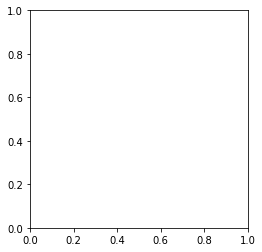

In [30]:
plt.imshow(training_set[0],cmap = plt.get_cmap('gray'))